# __Student Stress Level Analysis__

In [13]:
import numpy as np      
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("./PythonCSV/StressLevelDataset.csv")        
# print(data.head(), "\n")

----------------------------------
## Level 0:
----------------------------------

#### Descriptive Statistics

1) How many students are in the dataset?
2) How many students have reported a history of mental health issues?
3) What is the average anxiety level of students in the dataset?

In [15]:
numberOfStudents = data.shape[0]
print("There are", numberOfStudents, "students in the dataset.")         

mentalHealth = data[data['mental_health_history'] == 1].shape[0]
print(mentalHealth, "students reported having a history of mental health issues.")    

averageAnxiety = data['anxiety_level'].mean()
averageAnxiety = round(averageAnxiety, 2)       
print(averageAnxiety, "is the average anxiety level amongst students in the dataset.")      

There are 1100 students in the dataset.
542 students reported having a history of mental health issues.
11.06 is the average anxiety level amongst students in the dataset.


----------------------------------
## Level 1:
----------------------------------

#### Psychological Factors:

1) How many students have a self-esteem level below the average?
2) What percentage of students have reported experiencing depression?

In [16]:
averageSelfEsteem = data['self_esteem'].mean()      
belowAverageSelfEsteem = data[data['self_esteem'] < averageSelfEsteem].shape[0]     
print(belowAverageSelfEsteem, "students have a self esteem level below the average.")        

# To find students that reported depression, I used any value greater than 0 as experiencing some level of depression. 
depressionTotalStudents = data[data['depression'] > 0].shape[0]     
percentageOfDepression = (depressionTotalStudents / numberOfStudents) * 100    

print(f"{percentageOfDepression:.2f}% percent of students have reported experiencing some level of depression.")           

507 students have a self esteem level below the average.
96.00% percent of students have reported experiencing some level of depression.


#### Physiological Factors:

1) How many students experience headaches frequently?
2) How many students rate their sleep quality as poor?
3) What is the average blood pressure reading among the students?

In [17]:
# Calculated frequent headaches as students who rated their headache as greater than a 3 (on a scale of 0-5)
frequentHeadaches = data[data['headache'] > 3].shape[0]
print(frequentHeadaches, "students experience frequent headaches.")        

# Calculated poor sleep quality as students who rated their quality of sleep below a 2 (on a scale of 0-5)
poorSleepQuality = data[data['sleep_quality'] < 2].shape[0]     
print(poorSleepQuality, "rated their sleep quality as poor.")                             

# Interpreted the blood pressure data as 0 being low blood pressure and 5 being high blood pressure.
averageBloodPressure = data['blood_pressure'].mean()  
averageBloodPressure = round(averageBloodPressure, 2)     
print(averageBloodPressure, "is the average blood pressure reading among students.")               

269 students experience frequent headaches.
362 rated their sleep quality as poor.
2.18 is the average blood pressure reading among students.


#### Environmental Factors:

1) How many students live in conditions with high noise levels?
2) How many students have reported not having their basic needs met?
3) What percentage of students feel unsafe in their living conditions?

In [18]:
# Calculated high noise levels as greater than 3 (on a scale of 0-5)
highNoiseLevels = data[data['noise_level'] > 3].shape[0]
print(highNoiseLevels, "students live in conditions with high noise levels.")       

# Calculated students not having their basic needs met as less than a 2 (on a scale of 0-5)
basicNeedsNotMet = data[data['basic_needs'] < 2].shape[0]
print(basicNeedsNotMet, "students have reported not having their basic needs met.")     

# Calculated students feeling unsafe as less than a 2 (on a scale of 0-5)
feelUnsafe = data[data['safety'] < 2].shape[0]
percentageOfUnsafe = (feelUnsafe / numberOfStudents) * 100    
print(f"{percentageOfUnsafe:.2f}% of students feel unsafe in their living conditions.")    


274 students live in conditions with high noise levels.
213 students have reported not having their basic needs met.
19.73% of students feel unsafe in their living conditions.


#### Academic Factors:

1) How many students rate their academic performance as below average?
2) How many students have concerns about their future careers?
3) What is the average study load reported by students?

In [19]:
averageAcademicPerformance = data['academic_performance'].mean()        

belowAverageAcademicPerformace = data[data['academic_performance'] < averageAcademicPerformance].shape[0]       
print(belowAverageAcademicPerformace, "students rate their academic performance as below average.")     

futureConcerns = data[data['future_career_concerns'] > 0].shape[0]    
print(futureConcerns, "students have concerns about their future careers.")         

averageStudyLoad = data['study_load'].mean()      
averageStudyLoad = round(averageStudyLoad, 2)
print("The average study load reported by students is", averageStudyLoad)      


561 students rate their academic performance as below average.
1070 students have concerns about their future careers.
The average study load reported by students is 2.62


#### Social Factors:

1) How many students feel they have strong social support?
2) How many students participate in extracurricular activities?
3) What percentage of students have experienced bullying?

In [20]:
# Scale for social support is 0-3, so I interpreted a "strong social support" as > 2 in the dataset
strongSocialSupport = data[data['social_support'] > 2].shape[0]    
print(strongSocialSupport, "students feel they have strong social support.")     

# Calculated extracurricular participation as above a 0 on the scale of 0-5
extracurricularParticipation = data[data['extracurricular_activities'] > 0].shape[0]
print(extracurricularParticipation, "students participate in extracurricular activities.")          

# Interpreted "experiencing bullying" as anything > 0 in the dataset. 
experiencedBullying = data[data['bullying'] > 0].shape[0]
experiencedBullyingPercentage = (experiencedBullying / numberOfStudents) * 100      
print(f"{experiencedBullyingPercentage:.2f}% of students have experienced at least some sort of bullying.")     


458 students feel they have strong social support.
1066 students participate in extracurricular activities.
96.45% of students have experienced at least some sort of bullying.


---------------------------------
## Level 2
---------------------------------
Are students who experience bullying more likely to have a history of mental health issues?

Do students with poor sleep quality also report higher levels of depression?

#### Percentage of students who experienced bullying (none, some, or lots) with mental health issues: 

Number of non-bullied students with mental health history: 19
Proportion of non-bullied students with mental health history: 48.72%
Number of bullied students who experienced some bullying with mental health history: 193
Proportion of bullied students who experienced some bullying with mental health history: 27.53%
Number of students who experienced lots of bullying with mental health history: 330
Proportion of students who experienced lots of bullying with mental health history: 91.67%


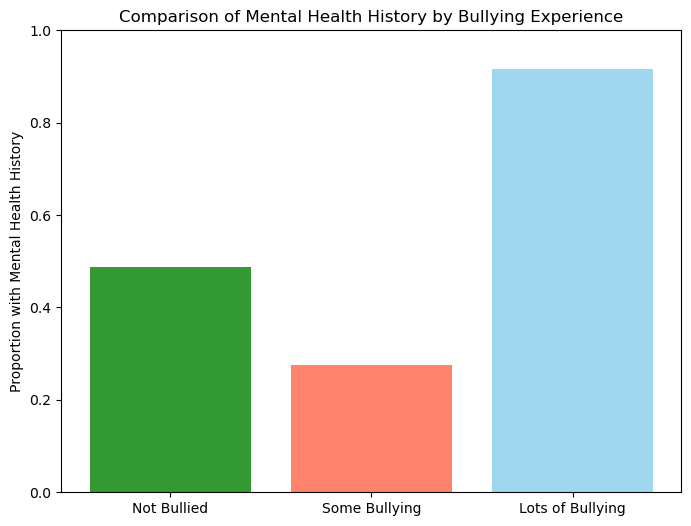

In [21]:
# Create subsets of the data based on bullying levels:
noBullying = data[data['bullying'] == 0]       
someBullying = data[(data['bullying'] > 0) & (data['bullying'] < 4)]        
moreBullying = data[data['bullying'] >= 4]      

# Count and calculate proportion for students with no bullying and mental health history
notBulliedCount = noBullying['mental_health_history'].sum()
notBulliedTotal = noBullying.shape[0]
notBulliedProportion = notBulliedCount / notBulliedTotal

# Count and calculate proportion for students with some bullying and mental health history
someBulliedCount = someBullying['mental_health_history'].sum()
someBulliedTotal = someBullying.shape[0]
someBulliedProportion = someBulliedCount / someBulliedTotal

# Count and calculate proportion for students with lots of bullying and mental health history
moreBulliedCount = moreBullying['mental_health_history'].sum()
moreBulliedTotal = moreBullying.shape[0]
moreBulliedProportion = moreBulliedCount / moreBulliedTotal

print(f"Number of non-bullied students with mental health history: {notBulliedCount}")
print(f"Proportion of non-bullied students with mental health history: {notBulliedProportion:.2%}")
print(f"Number of bullied students who experienced some bullying with mental health history: {someBulliedCount}")
print(f"Proportion of bullied students who experienced some bullying with mental health history: {someBulliedProportion:.2%}")
print(f"Number of students who experienced lots of bullying with mental health history: {moreBulliedCount}")
print(f"Proportion of students who experienced lots of bullying with mental health history: {moreBulliedProportion:.2%}")

# Data for plotting
categories = ['Not Bullied', 'Some Bullying', 'Lots of Bullying']
proportions = [notBulliedProportion, someBulliedProportion, moreBulliedProportion]

plt.figure(figsize=(8, 6))
plt.bar(categories, proportions, color=['green', 'tomato', 'skyblue'], alpha=0.8)
plt.ylabel('Proportion with Mental Health History')
plt.title('Comparison of Mental Health History by Bullying Experience')
plt.ylim(0, 1)  
plt.show()

Question: Are students who experience bullying more likely to have a history of mental health issues?

Answer: Yes, students who experience bullying are more likely to have a history of bullying. 

Analysis Explanation: To answer the question I broke up the data into categories of not being bullied at all (answered 0 on the survey), experienced some bullying (answered 1-3), and experienced lots of bullying (4-5). Students who experienced lots of bullying were significantly more likely to have a history of mental health issues compared to the other 2 categories. 

#### Average Levels of Depression By Sleep Quality: 

/var/folders/7_/5ct_yql501v2dk5_kv25qs740000gn/T/ipykernel_40901/3186782894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sleep_quality', y='depression', data=meanDepressionBySleep, palette='viridis')


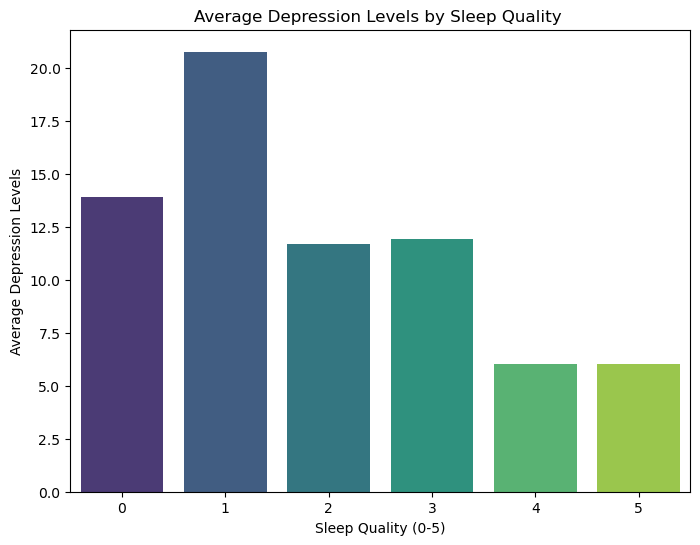

In [22]:
# Calculate mean depression levels for each sleep quality value (0-5 scale)
meanDepressionBySleep = data.groupby('sleep_quality')['depression'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='sleep_quality', y='depression', data=meanDepressionBySleep, palette='viridis')

plt.xlabel('Sleep Quality (0-5)')
plt.ylabel('Average Depression Levels')
plt.title('Average Depression Levels by Sleep Quality ')

plt.show()

Question: Do students with poor sleep quality also report higher levels of depression?

Answer: Yes, students who reported poorer sleep quality also, on average, reported higher levels of depression. 

Analysis Explanation: For the analysis of this question, I grouped the data by each unique level of sleep quality (on a 0-5 scale), and then calculated the mean depression level for each of the levels. Then, to visualize the difference between depression levels, I plotted the results using a bar chart. 

----------------------------------
## Level 3
----------------------------------
Which specific feature within each factor has the most significant impact on student stress, based on the dataset?


#### Correlation between each specific feature of all 5 factors and student stress levels:

In [23]:
# Code below calculates how each feature is correlated to student stress levels

correlationsToStressLevel = data.corr()['stress_level'].drop('stress_level')
print(correlationsToStressLevel)

anxiety_level                   0.736795
self_esteem                    -0.756195
mental_health_history           0.648644
depression                      0.734379
headache                        0.713484
blood_pressure                  0.394200
sleep_quality                  -0.749068
breathing_problem               0.573984
noise_level                     0.663371
living_conditions              -0.581723
safety                         -0.709602
basic_needs                    -0.708968
academic_performance           -0.720922
study_load                      0.634156
teacher_student_relationship   -0.680163
future_career_concerns          0.742619
social_support                 -0.632497
peer_pressure                   0.690684
extracurricular_activities      0.692977
bullying                        0.751162
Name: stress_level, dtype: float64


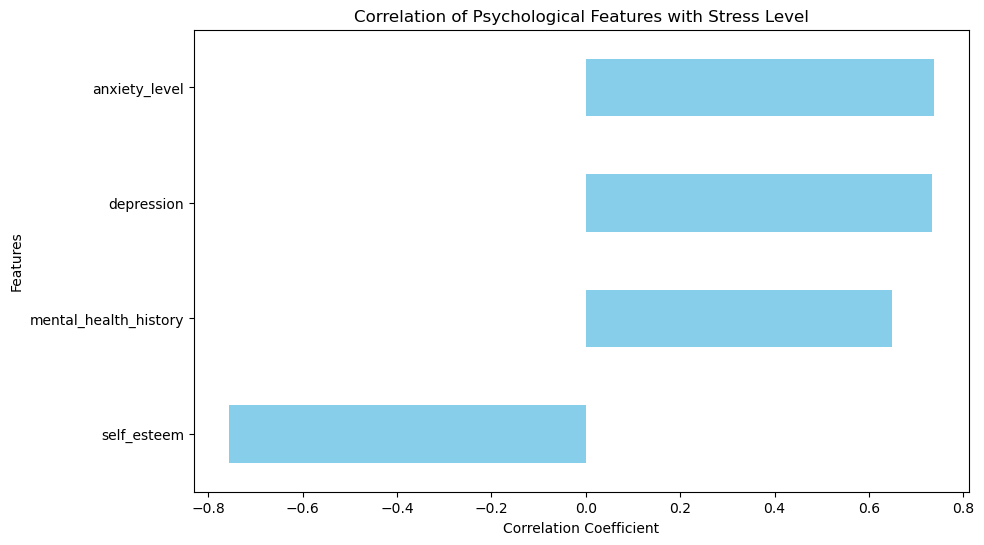

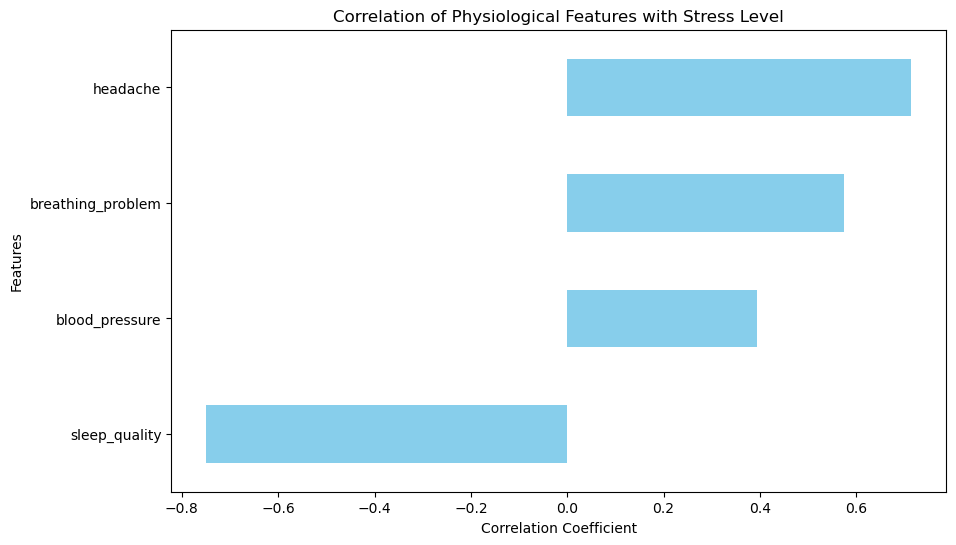

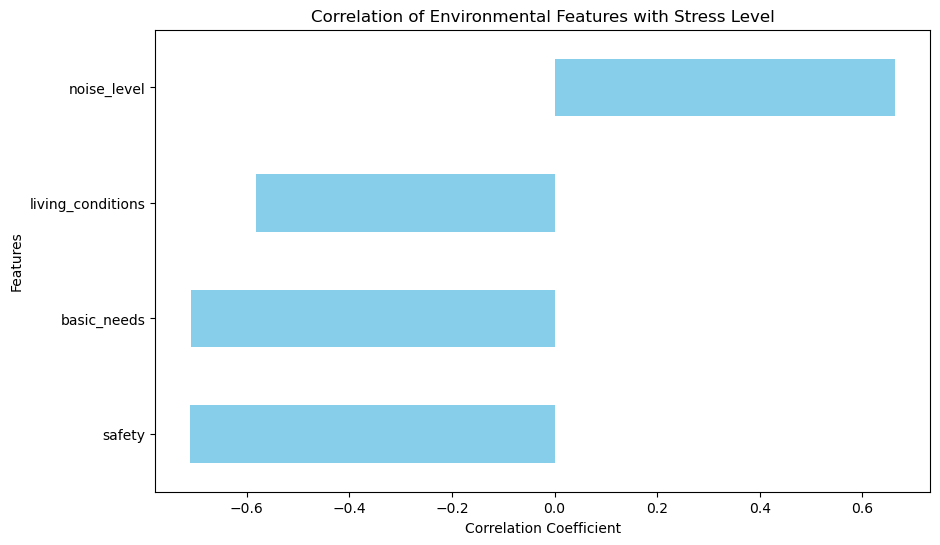

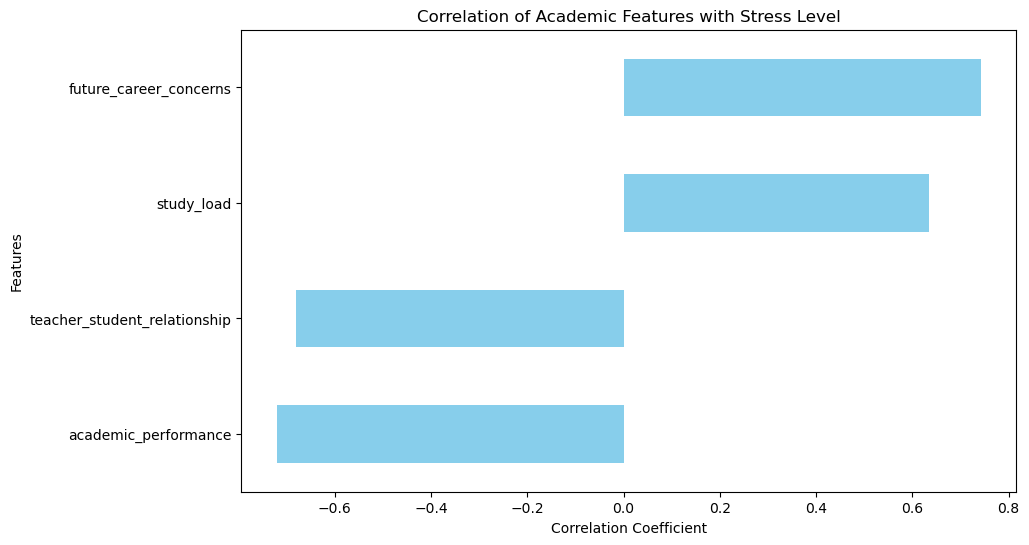

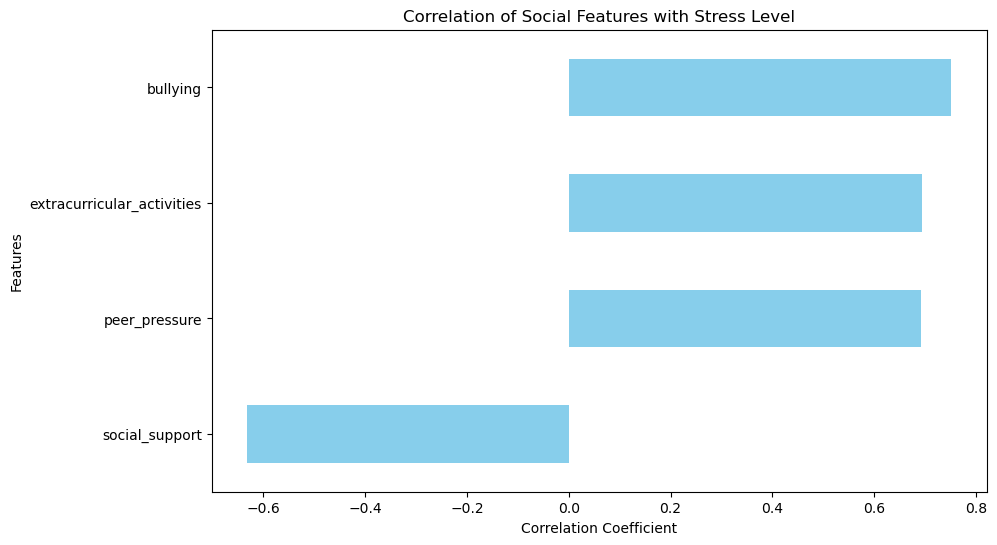

In [24]:
# Visualize the correlation data for each factor below:
# Each factor is broken down by their 4 respective features in the dataset. 

factors = {
    "Psychological": ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'],
    "Physiological": ['headache', 'sleep_quality', 'blood_pressure', 'breathing_problem'],
    "Environmental": ['noise_level', 'basic_needs', 'safety', 'living_conditions'],
    "Academic": ['academic_performance', 'future_career_concerns', 'study_load', 'teacher_student_relationship'],
    "Social": ['social_support', 'extracurricular_activities', 'bullying', 'peer_pressure']
}


# Plotting for each factor using a for loop
for factor, features in factors.items():
    plt.figure(figsize=(10, 6))
    factorCorrelations = correlationsToStressLevel[features]
    factorCorrelations.sort_values().plot(kind='barh', color='skyblue')
    plt.title(f'Correlation of {factor} Features with Stress Level')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.show()

Question: Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

Answers: 

Out of all Psychological features, self esteem has the most significant impact on student stress level.

Out of all Physiological features, sleep quality has the most significant impact on student stress level.

Out of all Environmental features, safety and basic needs have the most significant impact on student stress level.

Out of all Academic features, future career concerns has the most significant impact on student stress level.

Out of all Social features, bullying has the most significant impact on student stress level.

Analysis Explanation: Used correlations between each features of all 5 factors and student stress level to find out which featues most heavily impacted stress levels. From there, I used a bar chart to plot the data and visualize which features had the most significant correlation within their respective factor categories. 